In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as ani
import pandas as pd
from matplotlib import rc
from IPython.display import HTML

%matplotlib inline

plt.rc('axes', labelsize=18)
plt.rc('font', size=18)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)

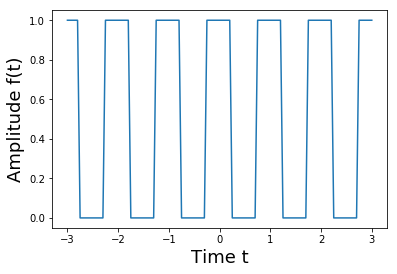

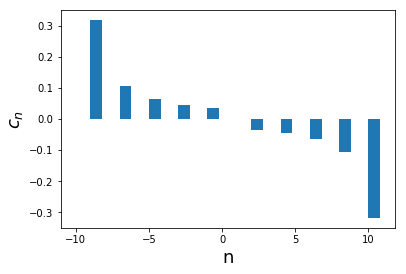

In [17]:
#Section 1

plot1 = np.zeros(121)
t = np.linspace(-3, 3, 121)

plot1[0:5] = 1
plot1[115:] = 1

for i in range(5):
    k = 15 + 20*i
    plot1[k:k+10] = 1
   
plt.figure(0)
plt.plot(t, plot1)
plt.xlabel('Time t')
plt.ylabel('Amplitude f(t)')
plt.savefig('Figure1.png')

n = np.linspace(-10,10,21)
c = np.zeros_like(n)

for i in range(10):
    c[2*i - 9] = 1 / (np.pi * (2*i - 9) )

plt.figure(1)
plt.bar(n, c, align='edge')
plt.xlabel('n')
plt.ylabel('$c_n$')
plt.savefig('Figure2.png')

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


0.961664431897


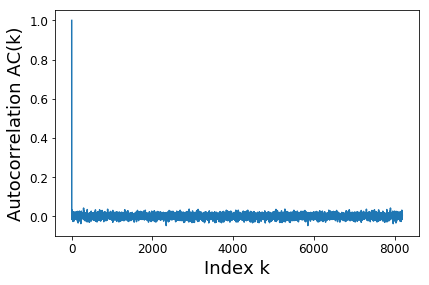

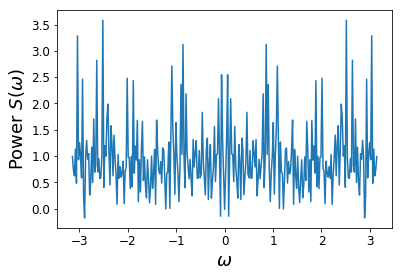

In [26]:
# ================== NOISE SECTION ==============================

# 3.1 Auto-correlation, PSD

def ac_problem(w_noise, N, filename):
    w_mean = np.mean(w_noise)
    ac = np.zeros(N)

    num = np.zeros_like(w_noise)
    den = np.zeros_like(w_noise)
    var = np.var(w_noise)
    
    for k in range(N):
        for t in range(N):
            if not k == t:
                num[k] += (w_noise[t] - w_mean) * (w_noise[(t+k) % N] - w_mean)  
                den[k] += (w_noise[t] - w_mean)**2
    ac = num / den

    k = np.linspace(0,N,N)
    plt.figure(0)
    plt.plot(k, ac)
    plt.tight_layout()
    plt.xlabel('Index k')
    plt.ylabel('Autocorrelation AC(k)')
    plt.savefig(filename + "AC.png")

    omega = np.linspace(-np.pi, np.pi,301)
    s = np.zeros_like(omega)

    for i, val in enumerate(omega):
        s[i] = np.sum( ac * np.exp( -1j * val * k))
    plt.figure(1)
    plt.plot(omega, s)
    plt.xlabel('$\omega$')
    plt.ylabel('Power $S(\omega)$')
    plt.savefig(filename + "S.png")
    
    print(np.mean(s))
    
    return(s)

num = int(0)
number = 8192
w_noise = np.random.rand(number)
sn = ac_problem(w_noise, N=number, filename='uniform')

In [27]:
print(sn)

[ 0.99207007  0.73450906  0.62419554  1.13316732  0.48379037  3.28445627
  0.92976655  1.25588817  1.0169203   0.58609877  2.46062775  0.22756937
 -0.17525827  0.98512551  1.29867899  0.9414788   1.04476238  0.2581399
  0.49054057  1.17053682  0.49832804  1.70498301  0.69362387  0.81966939
  2.82138795  0.6967167   0.95169963  0.57416657  0.5921636   0.96643228
  3.58142698  0.40658369  1.1943778   1.00120599  1.71041433  1.98733428
  1.07529032  0.4522235   1.57653789  1.22360091  0.62599631  1.39779672
  0.96328358  0.63996984  0.08204803  1.02980501  0.57630436  0.7996488
  0.59911051  0.6811634   0.90161583  0.09370821  0.71627206  0.77729181
  2.47906285  0.97865388  0.97200502  0.38181829  0.99563597  0.41377588
  2.43299744  0.6760125   1.19050898  0.92425055  1.67924256  0.1345047
  0.93038748  0.31808752  1.10660547  1.65873879  0.53537275  0.98403728
  0.44671007  0.20669042  0.92988702  0.57293447  0.11422904  0.41799527
  0.99698071  0.38516261  0.64815326  1.12541301  0.08

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


1.0749210464


array([  1.01398774e+00,   7.00580179e-01,   7.94388005e-01,
         1.03729629e+00,   7.59757928e-01,   9.20530782e-01,
         3.52188266e-01,   1.16128727e+00,   6.75328309e-01,
         1.29568492e+00,   1.71574600e+00,   3.82892138e+00,
         1.19703755e+00,   9.91880596e-01,   2.20950697e+00,
         4.25641981e-01,   9.87295608e-01,  -2.63549882e-02,
         1.79074483e+00,   1.42376972e+00,   2.79800379e-01,
         1.31606762e+00,   6.41134225e-01,   8.06840702e-01,
         5.47539378e-01,   8.19389752e-01,   1.31186178e+00,
         8.15530644e-01,   1.21473687e+00,   1.02875367e+00,
         9.91263390e-01,   2.15964882e+00,   1.08307841e+00,
         2.35062193e+00,   2.79098687e-01,   1.05392591e+00,
         9.26377313e-01,   3.03600236e+00,   4.53497036e-01,
         1.23037274e+00,   6.93366025e-01,   2.21123804e-01,
         1.08600155e+00,   1.71179321e+00,   5.20431494e+00,
         9.89568401e-01,   1.50954807e+00,   1.90567504e-01,
         1.80990303e+00,

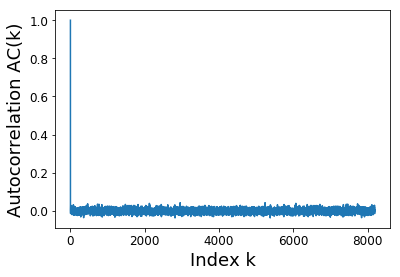

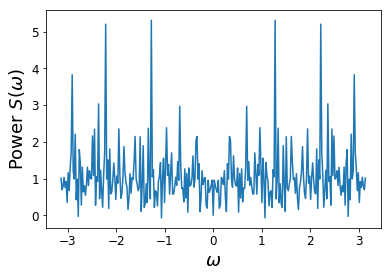

In [25]:
w_noise = np.random.randn(number)
ac_problem(w_noise, N=number, filename='Gaussian')

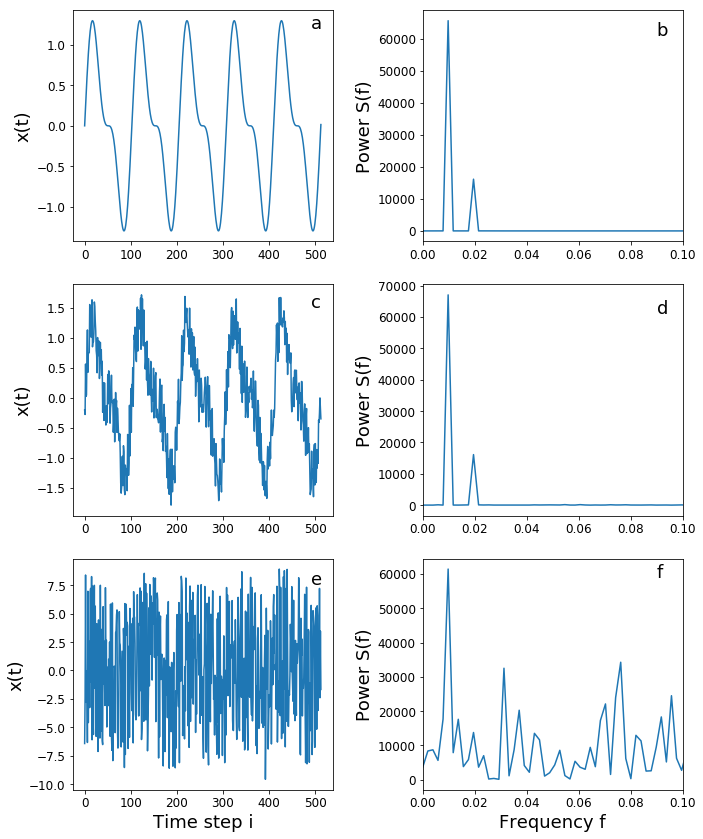

In [5]:
#Spectral Subtraction
f0 = 440
dt = 0.0000222
N = 512

t = np.linspace(0, N*dt, N)
i = np.linspace(0, N, N)

x = np.sin(2*np.pi*f0*t) + 0.5*np.sin(2*np.pi*(2*f0)*t)

fig, ax = plt.subplots(3,2, figsize=(10,12))
ax[0,0].plot(i, x)
ax[0,0].set_ylabel('x(t)')
ax[0,0].text(490,1.2,'a')

X = np.abs(np.fft.fft(x))**2
Xfreq = np.fft.fftfreq(len(x))

ax[0,1].plot(Xfreq[:256], X[:256])
ax[0,1].set_xlim(0,0.1)
ax[0,1].set_ylabel('Power S(f)')
ax[0,1].text(0.09, 61000,'b')

#Now with random noise
x += np.random.uniform(-0.5, 0.5, N)

ax[1,0].plot(i, x)
ax[1,0].set_ylabel('x(t)')
ax[1,0].text(490,1.5,'c')

X = np.abs(np.fft.fft(x))**2
Xfreq = np.fft.fftfreq(len(x))

ax[1,1].plot(Xfreq[:256], X[:256])
ax[1,1].set_xlim(0,0.1)
ax[1,1].set_ylabel('Power S(f)')
ax[1,1].text(0.09, 61000,'d')

r = 8.

x += np.random.uniform(-r, r, N)

ax[2,0].plot(i, x)
ax[2,0].set_xlabel('Time step i')
ax[2,0].set_ylabel('x(t)')
ax[2,0].text(490,7.6,'e')

X = np.abs(np.fft.fft(x))**2
Xfreq = np.fft.fftfreq(len(x))

ax[2,1].plot(Xfreq[:256], X[:256])
ax[2,1].set_xlabel('Frequency f')
ax[2,1].set_ylabel('Power S(f)')
ax[2,1].set_xlim(0,0.1)
ax[2,1].text(0.09, 59000,'f')

fig.tight_layout()

fig.savefig('spectral_filter.png')

15.9824380392


C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


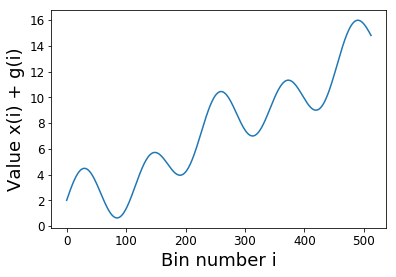

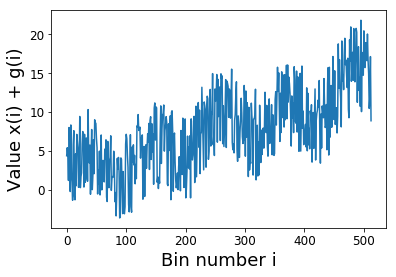

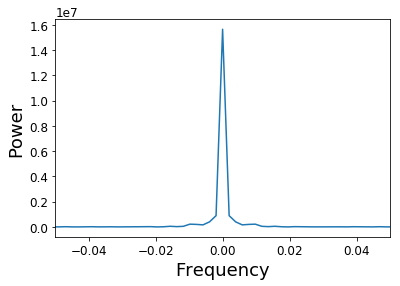

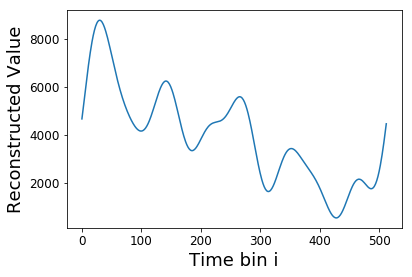

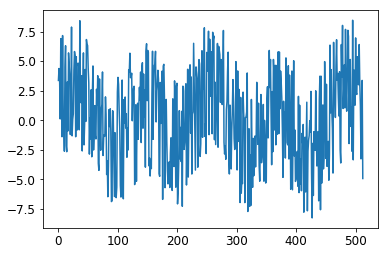

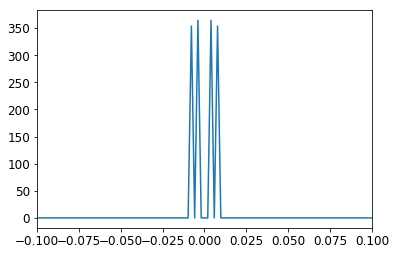

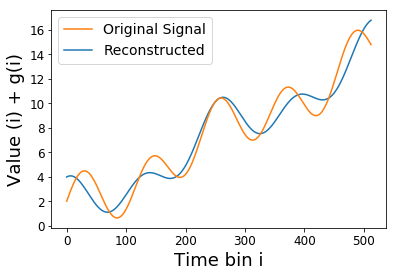

In [61]:
#Noise and trends
f0 = 9./512.
f1 = 4./512.

g = 1. + 0.025*i
x = 2*np.sin(np.pi*f0*i) + np.cos(np.pi*f1*i) + g
print(np.amax(x))
Xfreq = np.linspace(-0.5,0.49804688, 512)

plt.figure(0)
plt.plot(i,x)
plt.xlabel('Bin number i')
plt.ylabel('Value x(i) + g(i)')
plt.savefig('trend.png')

x += np.random.uniform(-6,6,N)

plt.figure(1)
plt.plot(i,x)
plt.xlabel('Bin number i')
plt.ylabel('Value x(i) + g(i)')
plt.savefig('noise_trend.png')

X = np.fft.fft(x)
s = np.abs(X)**2
s_fix = np.concatenate((s[256:], s[:256]),axis=0)


plt.figure(2)
plt.plot(Xfreq, s_fix)
plt.xlim(-0.05,0.05)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.savefig('trend_fft.png')

X = X * (np.abs(X) > 180.).astype(int)
x_idft = np.fft.fft(X)

plt.figure(3)
plt.plot(i,x_idft)
plt.xlabel('Time bin i')
plt.ylabel('Reconstructed Value')
plt.savefig('Reconstruction')

x -= g
plt.figure(4)
plt.plot(i, x)
X = np.fft.fft(x)
X = X * (X > 180.).astype(int)
X_fix = np.concatenate((X[256:], X[:256]),axis=0)
plt.figure(5)
plt.plot(Xfreq, X_fix)
plt.xlim(-0.1,0.1)
x_idft = np.fft.fft(X)
x_idft += g

x_orig = 2*np.sin(np.pi * f0 * i) + np.cos(np.pi *f1 * i) + g
reconstruct = x_idft * 3 / np.amax(x_idft) + g

plt.figure(6)
recon, = plt.plot(i,reconstruct, label='Reconstructed')
orig, = plt.plot(i,x_orig, label='Original Signal')
plt.legend(handles=[orig, recon])
plt.xlabel('Time bin i')
plt.ylabel('Value (i) + g(i)')
plt.savefig('reconstruction_fixed.png')

In [2]:
#========================= Lorenz System ===========================

#RK4 code example from rosetta code
from math import sqrt

file = open('lorenz_1.txt', 'w')

#Initialize
t0  = 0.
x0  = 5.
y0  = 5.
z0  = 5.
sig = 10.
r   = 28.
b   = 8/3

def fx(x, y, z, r):
    return sig*(y - x)

def fy(x, y, z, r):
     return r*x - y - x*z
    
def fz(x, y, z, r):
    return x*y - b*z

def rk4(t0, x0, y0, z0, t_step, n,  r):
    dt = [0] * (n + 1)
    dx = [0] * (n + 1)
    dy = [0] * (n + 1)
    dz = [0] * (n + 1)
    h = t_step
    dt[0] = t = t0
    dx[0] = x = x0
    dy[0] = y = y0
    dz[0] = z = z0
    
    for i in range(1, n + 1):
        k1 = h * fx(x, y, z, r)
        l1 = h * fy(x, y, z, r)
        m1 = h * fz(x, y, z, r)
        
        k2 = h * fx(x + 0.5 * k1, y + 0.5 * l1, z + 0.5 * m1, r)
        l2 = h * fy(x + 0.5 * k1, y + 0.5 * l1, z + 0.5 * m1, r)
        m2 = h * fz(x + 0.5 * k1, y + 0.5 * l1, z + 0.5 * m1, r)
        
        k3 = h * fx(x + 0.5 * k2, y + 0.5 * l2, z + 0.5 * m2, r)
        l3 = h * fy(x + 0.5 * k2, y + 0.5 * l2, z + 0.5 * m2, r)
        m3 = h * fz(x + 0.5 * k2, y + 0.5 * l2, z + 0.5 * m2, r)
        
        k4 = h * fx(x + k3, y + k3, z + m3, r)
        l4 = h * fy(x + k3, y + k3, z + m3, r)
        m4 = h * fz(x + k3, y + k3, z + m3, r)
        
        dt[i] = t = t0 + i * h
        dx[i] = x = x + (k1 + k2 + k2 + k3 + k3 + k4) / 6
        dy[i] = y = y + (l1 + l2 + l2 + l3 + l3 + l4) / 6
        dz[i] = z = z + (m1 + m2 + m2 + m3 + m3 + m4) / 6
    return dt, dx, dy, dz

dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=400, r=r)
for i in range(400):
    print("%4.2f %10.5f %10.5f %10.5f" % (dt[i], dx[i], dy[i], dz[i]))
    file.write("%4.2f %10.5f %10.5f %10.5f\n" % (dt[i], dx[i], dy[i], dz[i]))
file.close()

dt = np.asarray(dt)
dx = np.asarray(dx)
dy = np.asarray(dy)
dz = np.asarray(dz)
print(np.amin(dx), np.amax(dx), np.amin(dy), np.amax(dy), np.amin(dz), np.amax(dz))

0.00    5.00000    5.00000    5.00000
0.05    5.78455   10.69935    6.13802
0.10    8.79429   17.32210    9.98664
0.15   13.46742   23.73716   19.57474
0.20   18.14174   22.84367   35.88160
0.25   18.27798    9.29602   47.10687
0.30   11.96979   -4.34760   43.07799
0.35    4.12842   -8.61038   35.01162
0.40   -1.35256   -8.54320   30.13899
0.45   -4.34792   -8.03757   27.60464
0.50   -5.90104   -7.95071   26.15261
0.55   -6.81682   -8.28277   25.33636
0.60   -7.52625   -8.87602   25.06549
0.65   -8.20182   -9.53292   25.33675
0.70   -8.85304  -10.02829   26.10550
0.75   -9.38750  -10.14321   27.20274
0.80   -9.66915   -9.75664   28.31065
0.85   -9.59575   -8.94552   29.05249
0.90   -9.17366   -7.97946   29.17432
0.95   -8.53456   -7.17440   28.66862
1.00   -7.87502   -6.73372   27.73115
1.05   -7.37063   -6.70812   26.62698
1.10   -7.12744   -7.05347   25.59662
1.15   -7.18141   -7.69166   24.83430
1.20   -7.51750   -8.52611   24.49740
1.25   -8.08091   -9.41947   24.70453
1.30   -8.77

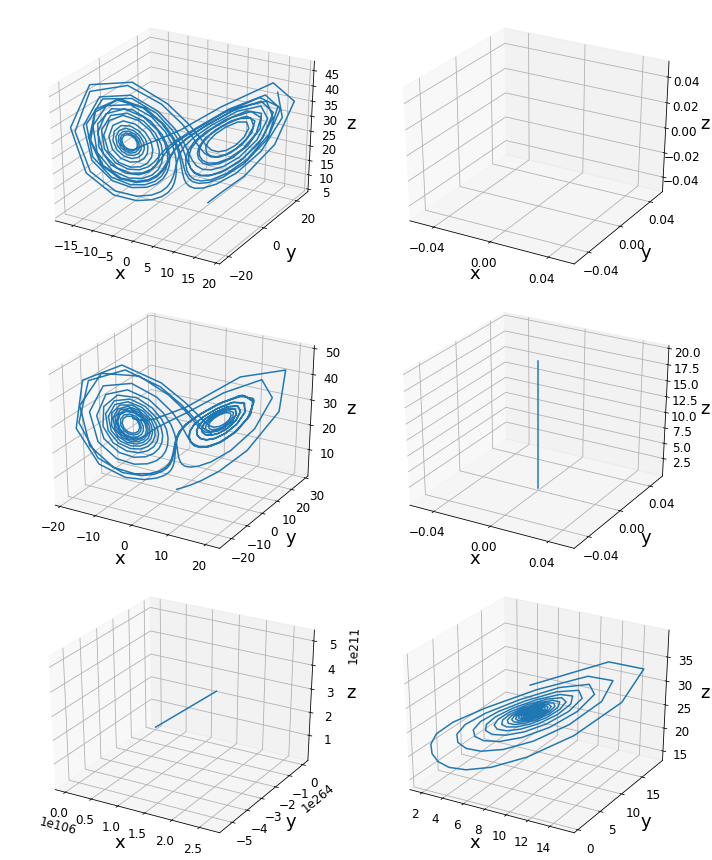

In [46]:
%matplotlib inline

fig = plt.figure(figsize=(10,12))
x0, y0, z0 = 5., 5., 5.
dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=400, r=r)
ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.plot(dx, dy, dz)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_yticks([-20,0,20])

x0, y0, z0 = 0., 0., 0.
dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=100, r=r)
ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.plot(dx, dy, dz)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xticks([-0.04,0,0.04])
ax.set_yticks([-0.04,0,0.04])
plt.tight_layout()

x0, y0, z0 = 0.1, 0.1, 0.1
dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=400, r=r)
ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.plot(dx, dy, dz)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xticks([-20,-10,0,10,20])
#ax.set_yticks([-0.04,0,0.04])

x0, y0, z0 = 0., 0., 20.
dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=400, r=r)
ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.plot(dx, dy, dz)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xticks([-0.04,0,0.04])
ax.set_yticks([-0.04,0,0.04])

x0, y0, z0 = 100., 100., 100.
dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=100, r=r)
ax = fig.add_subplot(3, 2, 5, projection='3d')
ax.plot(dx, dy, dz)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#for i in range(100):
#    print("%4.2f %10.5f %10.5f %10.5f" % (dt[i], dx[i], dy[i], dz[i]))

x0, y0, z0 = 8.5, 8.5, 27
dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=400, r=r)
ax = fig.add_subplot(3, 2, 6, projection='3d')
ax.plot(dx, dy, dz)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_yticks([0, 5, 10, 15])

plt.show()

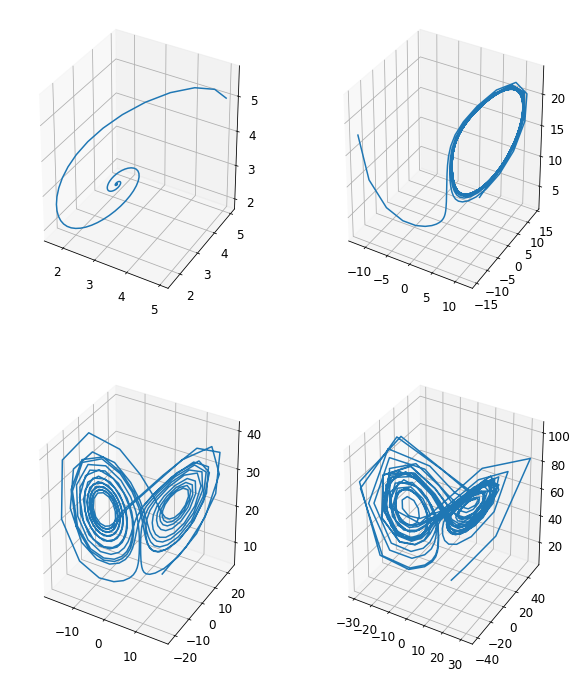

In [86]:
fig = plt.figure(figsize=(10,12))
x0, y0, z0 = 5., 5., 5.
dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=400, r=4.)
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(dx, dy, dz)

dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=400, r=16.15468)
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot(dx, dy, dz)

dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=400, r=25.)
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot(dx, dy, dz)

dt, dx, dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=400, r=60.)
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.plot(dx, dy, dz)

<IPython.core.display.Javascript object>


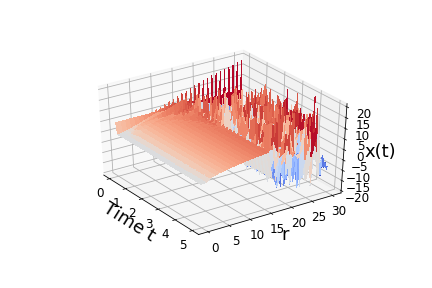

In [4]:
#Getting bifurcation of the Lorenz System. Assuming it is asking for 3d surface of x vs r
from matplotlib import cm
%matplotlib notebook

x0, y0, z0 = 5., 5., 5.

x_array = np.zeros((400,30))
r_array = np.linspace(0,30,30)
t_array = np.linspace(0,5,400)
R, T = np.meshgrid(r_array, t_array)

for i, val in enumerate(r_array):
    dt, x_array[:,i], dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=399, r=val )
    
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, R, x_array, cmap=cm.coolwarm, antialiased=False)
ax.dist = 13
ax.set_xlabel('Time t')
ax.set_ylabel('r')
ax.set_zlabel('x(t)')
plt.tight_layout()
fig.savefig('bifurcation')

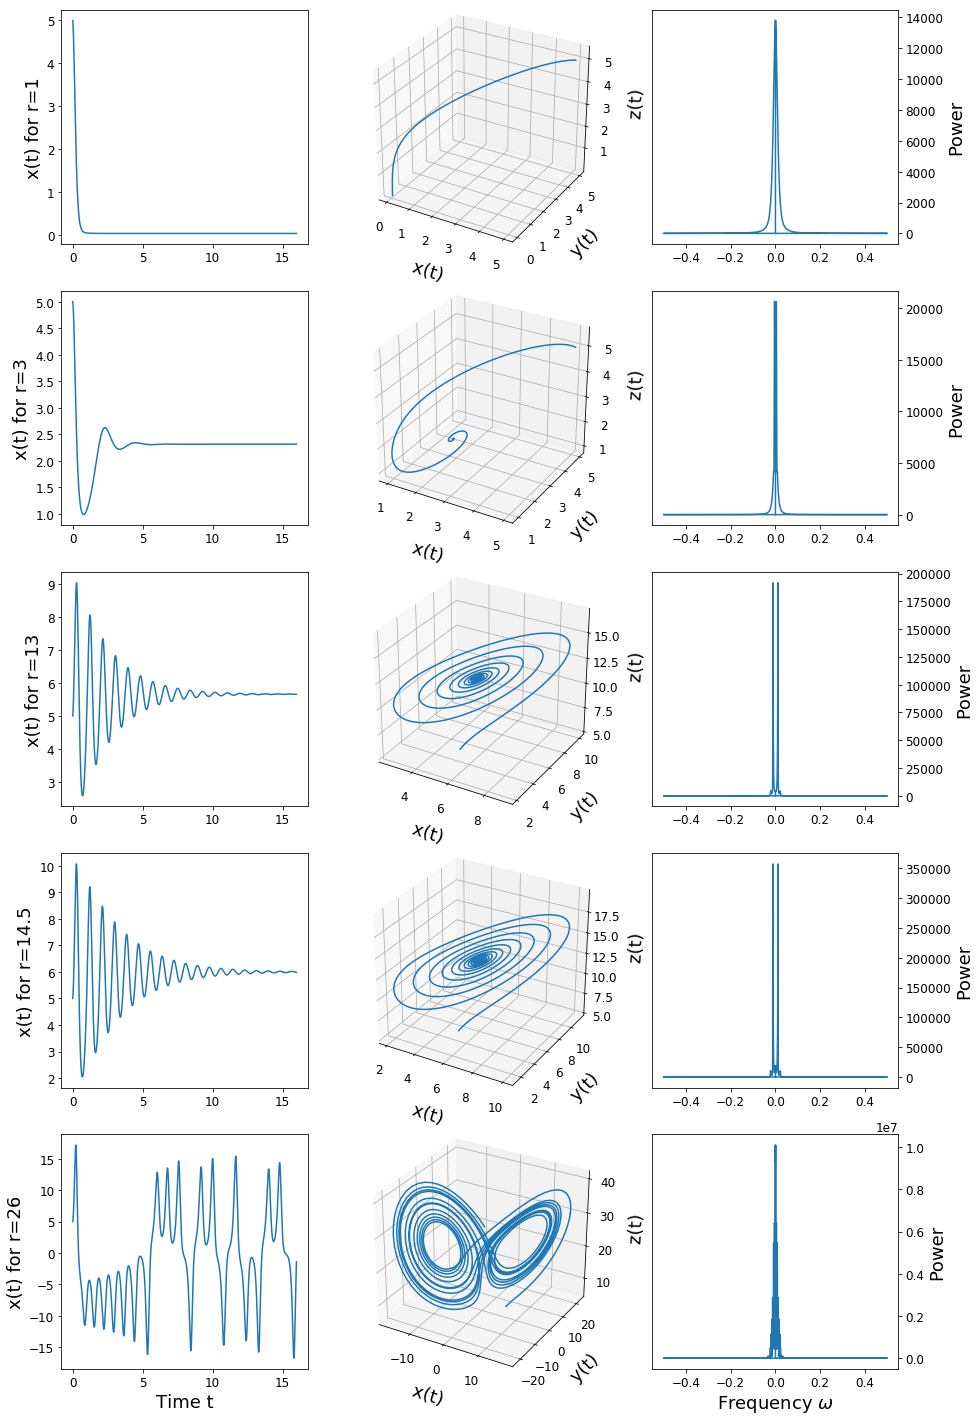

In [11]:
#Fourier transform of the x-spectra
%matplotlib inline

#Let's do this iteratively using a new x-array
r_interest = [1, 3, 13, 14.5, 26]
x_array = np.zeros((1600,5))
t_array = np.zeros((1600,5))
y_array = np.zeros((1600,5))
z_array = np.zeros((1600,5))

for i, val in enumerate(r_interest):
    t_array[:,i], x_array[:,i], y_array[:,i], z_array[:,i]  = rk4(t0, x0, y0, z0, t_step=0.01, n=1599, r=val )

x_fft = np.zeros_like(x_array, dtype=complex)

for i in range(5):
    x_fft[:,i] = np.fft.fft(x_array[:,i])

x_freq = np.fft.fftfreq(t_array[:,0].size)

#Set up the figure
fig = plt.figure(figsize=(15,25))
for i, val in enumerate(r_interest):

    #Left panel
    ax = fig.add_subplot(5, 3, 3*i+1)
    ax.plot(t_array[:,i], x_array[:,i])
    ax.set_ylabel('x(t) for r=' + str(val))
    if i == 4:
        ax.set_xlabel('Time t')
    
    #Middle panel
    ax = fig.add_subplot(5, 3, 3*i+2, projection='3d')
    ax.plot(x_array[:,i], y_array[:,i], z_array[:,i])
    ax.dist = 9
    ax.set_xlabel('\n x(t)')
    ax.set_ylabel('\n y(t)')
    ax.set_zlabel('\n z(t)')
    
    #Right panel
    x_fft[0,:] = 0
    ax = fig.add_subplot(5, 3, 3*i+3)
    ax.plot(x_freq, np.abs(x_fft[:,i]**2))
    ax.yaxis.tick_right()
    ax.set_ylabel('Power')
    ax.yaxis.set_label_position("right")
    #ax.set_xlim(-0.1,0.1)
    if i == 4:
        ax.set_xlabel('Frequency $\omega$')
    
plt.show()
fig.savefig('15spectra')

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


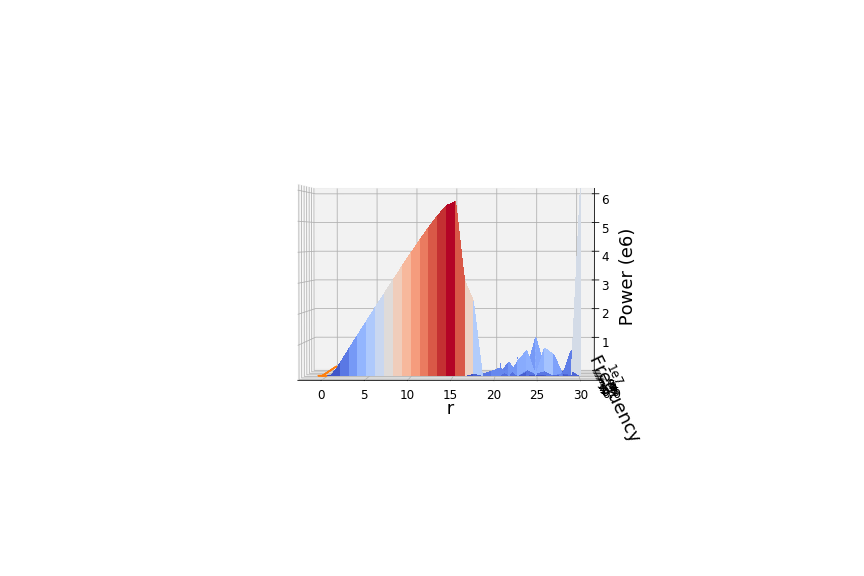

In [5]:
# Make a 3d fft plot of varying r
%matplotlib notebook
from matplotlib import cm

#Let's do this iteratively using a new x-array
r_array = np.linspace(0,30,30)
x_array = np.zeros((30, 400))
x_fft = np.zeros_like(x_array)

for i, val in enumerate(r_array):
    dt, x_array[i,:], dy, dz  = rk4(t0, x0, y0, z0, t_step=0.05, n=399, r=val )
    x_fft[i,:] = np.fft.fft(x_array[i,:])

x_freq = np.fft.fftfreq(len(dt))
XF, R = np.meshgrid(x_freq, r_array)    

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(R, XF, np.abs(x_fft**2) / 10**6, cmap=cm.coolwarm, antialiased=False)
#ax.set_ylim3d(-0.1,0.1)
ax.set_zticks([1,2,3,4,5,6])
ax.dist = 13
ax.set_xlabel('\n r')
ax.set_ylabel('\n Frequency')
ax.set_zlabel('\n Power (e6)')

plt.show()

[  1.32980760e+15 +5.57028505e+08j   1.32834624e+05 +5.56803348e+03j
   3.31213781e+04 +2.78157326e+03j ...,  -5.72245416e-81 -8.23338531e-81j
  -5.18405192e-81 -8.16868308e-81j  -4.66760048e-81 -8.08452119e-81j]


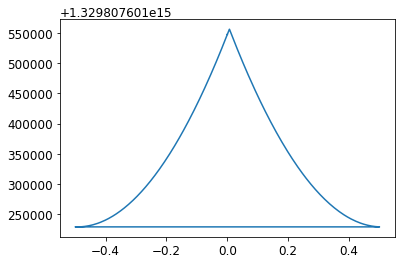

In [31]:
from scipy import erf
#Heat equation
x0=2./3.
sigma = 0.03

k = np.linspace(0.0000001,100,10000)

#t_hat = (1. /( np.sqrt(2*np.pi*sigma**2) * k**2)) * np.exp(-2 * sigma**2 * k**2 * np.pi**2 + 2 * np.pi * 1j * k *x0)

t = np.fft.fft(t_hat)
x = np.fft.fftfreq(len(t_hat))

print(t_hat)

plt.plot(x, np.abs(t))

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


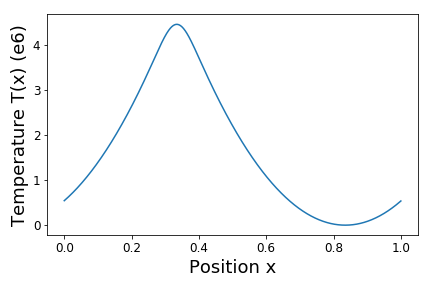

C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [6]:
x = np.linspace(0, 1, 1000)
x0=2./3.
sigma = 0.03

q = (1. / np.sqrt(2*np.pi*sigma**2)) * np.exp( -(x - x0)**2 / (2*sigma**2))
q_fft = np.fft.fft(q, norm='ortho')
k = np.fft.fftfreq(q.size)

t_fft = (1. / k**2) * q_fft
t_fft[np.where(k==0.)] = 0

plt.plot(k, np.abs(t_fft))
#for i in range(t_fft.size):
 #   print(i, k[i], t_fft[i])
t = np.fft.fft(t_fft, norm='ortho')
t -= np.amin(t)

plt.figure(2)
plt.plot(x, t/10**6 )
plt.xlabel('Position x')
plt.ylabel('Temperature T(x) (e6)')
plt.tight_layout()
plt.savefig('temp.png')

In [ ]:
-494277992 -847892494
-494277992 +847892494